In [1]:
import numpy as np 
import pandas as pd 
import json 
from ipyleaflet import Map, GeoJSON,Heatmap
import matplotlib.pyplot as plt 
from fetch_data import fetch_data
import geopandas as gp 
import seaborn as sns 


geo_json_data  = fetch_data("data/ground_truth/ground_truth.geojson")

ground_truth_df = fetch_data('data/ground_truth/ground_truth_R.csv')

gdf = gp.GeoDataFrame(ground_truth_df, geometry=gp.points_from_xy(ground_truth_df['lon'], ground_truth_df['lat']), crs="EPSG:4326")
gdf['iwi_mean'] = gdf['iwi_mean']/100 #scale IWIs by 100 
gdf = gdf[gdf['month.of.interview'] > 0]
gdf['date'] = pd.to_datetime(dict(year = gdf['year.of.interview'], month = gdf['month.of.interview'], day = 15))

# fiilter data by the start and end year for a single band 
def create_band(gdf, start, end):
    gdf = gdf[['country','year.of.interview','date','iwi_mean','geometry']]
    return gdf[(gdf['year.of.interview'] >= start) & (gdf['year.of.interview'] <= end)]

# create a dictionary storing each band's data based on their year range 
empty_dict = {}
def create_dict(ground_truth_dict):
    start = 1990 
    for i in range(1,11): 
        end = start +2 
        band = create_band(gdf, start, end)
        ground_truth_dict[f'band_{i}'] = band 
        temp = end 
        start = temp +1 
    return ground_truth_dict

ground_truth_dict = create_dict(empty_dict)

gdf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Unnamed: 0                 RegionID                     ClusterID  \
0               1  AO.Estavel Mesoendemica  AO.Estavel Mesoendemica.51.1   
1               2  AO.Estavel Mesoendemica  AO.Estavel Mesoendemica.51.1   
2               3  AO.Estavel Mesoendemica  AO.Estavel Mesoendemica.51.2   
3               4  AO.Estavel Mesoendemica  AO.Estavel Mesoendemica.51.3   
4               5  AO.Estavel Mesoendemica  AO.Estavel Mesoendemica.51.4   
...           ...                      ...                           ...   
66024       66025                ZM.Lusaka              ZM.Lusaka.71.541   
66025       66026              ZM.Muchinga            ZM.Muchinga.71.542   
66026       66027                ZM.Lusaka              ZM.Lusaka.71.543   
66027       66028               ZM.Central             ZM.Central.71.544   
66028       66029              ZM.Muchinga            ZM.Muchinga.71.545   

             lon        lat  country.code.ISO.3166.alpha.3  year.of.interview  \
0      13.859255 -12.169283                             24               2006   
1      13.859255 -12.169283                             24               2006   
2      13.845458 -12.167753                             24               2006   
3      13.607121 -12.747312                             24               2006   
4      14.060841 -11.502919                             24               2006   
...          ...        ...                            ...                ...   
66024  28.370067 -15.416081                            894               2018   
66025  32.946955 -11.150453                            894               2018   
66026  28.299570 -15.769918                            894               2018   
66027  30.039495 -12.876392                            894               2018   
66028  32.608905  -9.421954                            894               2018   

       month.of.interview  rural country continent  iwi_mean     iwi_var  \
0                      12  Urban  Angola    Africa  0.632356   51.530785   
1                      11  Urban  Angola    Africa  0.632356   51.530785   
2                      11  Urban  Angola    Africa  0.596262   99.839389   
3                      11  Urban  Angola    Africa  0.640985   96.416849   
4                      12  Urban  Angola    Africa  0.505828  359.699498   
...                   ...    ...     ...       ...       ...         ...   
66024                   9  Urban  Zambia    Africa  0.530495  201.920771   
66025                   9  Rural  Zambia    Africa  0.179347   70.917266   
66026                  12  Rural  Zambia    Africa  0.340004  305.619875   
66027                   9  Rural  Zambia    Africa  0.135886   59.794252   
66028                  12  Rural  Zambia    Africa  0.205844  261.427106   

       iwi_skewness  iwi_kurtosis                    geometry       date  
0         -1.136435      4.376306  POINT (13.85925 -12.16928) 2006-12-15  
1         -1.136435      4.376306  POINT (13.85925 -12.16928) 2006-11-15  
2         -1.121912      3.897659  POINT (13.84546 -12.16775) 2006-11-15  
3         -0.199522      2.731744  POINT (13.60712 -12.74731) 2006-11-15  
4         -0.507887      2.371137  POINT (14.06084 -11.50292) 2006-12-15  
...             ...           ...                         ...        ...  
66024     -0.296764      3.270728  POINT (28.37007 -15.41608) 2018-09-15  
66025      0.186924      2.157706  POINT (32.94696 -11.15045) 2018-09-15  
66026      0.645395      2.523493  POINT (28.29957 -15.76992) 2018-12-15  
66027      0.061590      1.959555   POINT (30.0395 -12.87639) 2018-09-15  
66028      1.139779      3.475082    POINT (32.6089 -9.42195) 2018-12-15  

[65655 rows x 17 columns]

In [2]:
#load data for each band 
band_dict= {}
for i in range(1,11): 
    band_json = fetch_data(f'data/band_geojson/band_{i}.geojson')
    band_dict[f'band_{i}'] = band_json
    print(f'Band {i} upload complete!')

with open('data/band_json.geojson', 'w') as w:
    json.dump(band_dict, w, indent=4)



Band 1 upload complete!
Band 2 upload complete!
Band 3 upload complete!
Band 4 upload complete!
Band 5 upload complete!
Band 6 upload complete!
Band 7 upload complete!
Band 8 upload complete!
Band 9 upload complete!
Band 10 upload complete!


In [3]:
#load all data at once and perform spatial join for each band 
with open('data/band_json.geojson') as d: 
    band_data = json.load(d)

joined_gdf_list = []
for i in range(1, 11):
    print(f'Processing Band {i}...')
    pred_gdf = gp.GeoDataFrame.from_features(band_data[f'band_{i}'], crs = "EPSG:4326")
    pred_gdf = pred_gdf.rename(columns={'IWI':'iwi_pred'})

    joined_gdf = gp.sjoin(ground_truth_dict[f'band_{i}'], pred_gdf, predicate='intersects')
    joined_gdf['residual'] = joined_gdf['iwi_pred'] - joined_gdf['iwi_mean']
    joined_gdf_list.append(joined_gdf)


#join all the dataframes together into a single dataframe 
full_gdf = pd.concat(joined_gdf_list)

full_gdf


Processing Band 1...
Processing Band 2...
Processing Band 3...
Processing Band 4...
Processing Band 5...
Processing Band 6...
Processing Band 7...
Processing Band 8...
Processing Band 9...
Processing Band 10...


country  year.of.interview       date  iwi_mean  \
2364   Cameroon               1991 1991-08-15  0.210099   
2365   Cameroon               1991 1991-07-15  0.254330   
2366   Cameroon               1991 1991-07-15  0.174986   
2367   Cameroon               1991 1991-07-15  0.174986   
2368   Cameroon               1991 1991-07-15  0.178511   
...         ...                ...        ...       ...   
66019    Zambia               2018 2018-10-15  0.348706   
66022    Zambia               2018 2018-08-15  0.547186   
66023    Zambia               2018 2018-08-15  0.530495   
66024    Zambia               2018 2018-09-15  0.530495   
66028    Zambia               2018 2018-12-15  0.205844   

                         geometry  index_right  iwi_pred  residual  
2364         POINT (14.9 12.3833)        30259  0.239990  0.029891  
2365          POINT (14.15 11.05)        37563  0.240723 -0.013607  
2366        POINT (14.15 10.8667)        38528  0.166138 -0.008848  
2367      POINT (13.8833 10.8667)        38527  0.150146 -0.024839  
2368           POINT (13.8 10.75)        39175  0.179443  0.000933  
...                           ...          ...       ...       ...  
66019  POINT (28.09312 -15.34204)       108281  0.504883  0.156177  
66022  POINT (28.34869 -15.39249)       108374  0.556641  0.009455  
66023  POINT (28.37007 -15.41608)       108455  0.439209 -0.091286  
66024  POINT (28.37007 -15.41608)       108455  0.439209 -0.091286  
66028    POINT (32.6089 -9.42195)       101268  0.182495 -0.023349  

[52102 rows x 8 columns]

In [ ]:
#rename two-word countries to standardized names 
full_gdf['country'].replace('Côte d’Ivoire', 'Ivory Coast')


2364     Cameroon
2365     Cameroon
2366     Cameroon
2367     Cameroon
2368     Cameroon
           ...   
66019      Zambia
66022      Zambia
66023      Zambia
66024      Zambia
66028      Zambia
Name: country, Length: 52102, dtype: object

In [19]:
#write to csv 
full_gdf.to_csv('data/residual_by_country.csv')

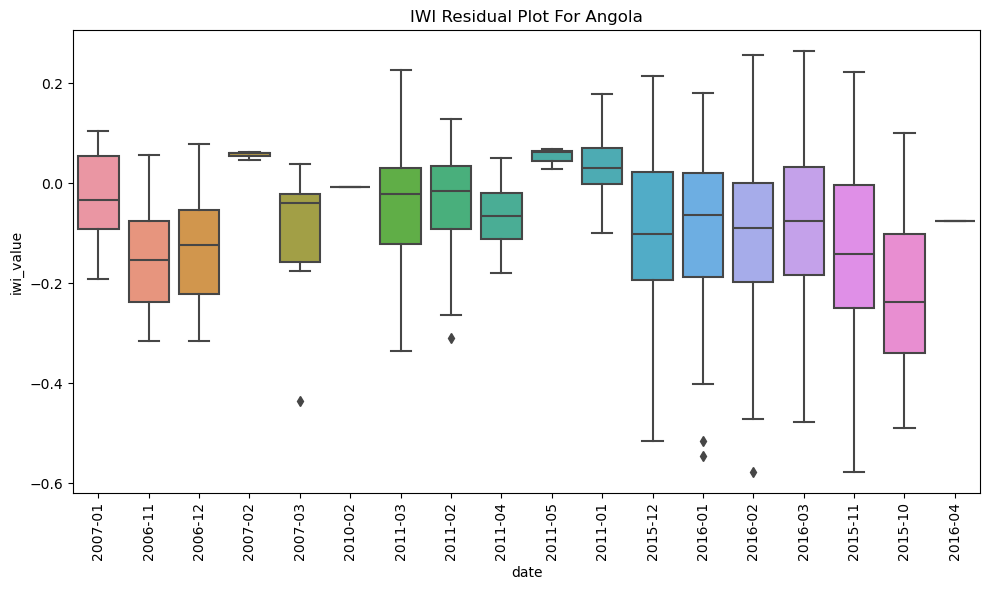

In [4]:
def plot_country(country_name, gdf):
    gdf = gdf[gdf['country'] == country_name]
    modified_xticks = gdf['date'].dt.to_period('M')
    plt.figure(figsize=(10,6))
    sns.boxplot(x=modified_xticks, y=gdf['residual'])
    plt.xlabel('date')
    plt.xticks(rotation=90)
    plt.ylabel('iwi_value')
    plt.title(f'IWI Residual Plot For {country_name}')
    plt.tight_layout()


plot_country('Angola', full_gdf)


